<a href="https://colab.research.google.com/github/RodrigoAB93/Trabalho_AM_Nao_Supervisionado/blob/main/Trabalho_Aprendizado_de_maquina_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#---------------------------------------------------------------------------------------------# 
### Trabalho desenvolvido para disciplina Aprendizado de Maquina não supervisionada. 
### Desenvolvido por: 
### Rodrigo Almeida Bezerra 
### rodrigobezerra@ufba.br  
### Professor:  Ricardo Araujo Rios  
### Fonte: https://www.kaggle.com/datasets/derrickmwiti/google-2019-cluster-sample 
#---------------------------------------------------------------------------------------------# 

In [42]:
#Importing necessary libraries. 

# DataFrame 
import pandas as pd 

# Matplot
import matplotlib.pyplot as plt
import matplotlib as mpl

# Scikit-learn
from sklearn import preprocessing, metrics
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score


# Helper Libraries 
import numpy as np 
import seaborn as sns   
import plotly.express as px   
import scipy.cluster.hierarchy as shc 

In [2]:
# Importando e lendo o dataset do google drive
data = pd.read_csv('/content/drive/MyDrive/Mestrado/TrabalhoInteligenciaComputacional/GoogleCluster2019.csv',sep=',') 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
0,0,0,2,94591244395,3,1,200,0,144,168846390496,...,0.014435,0.000415,NaN,NaN,1.000000,[0.00314331 0.00381088 0.00401306 0.00415039 0...,[0.00535583 0.00541687 0.00548553 0.00554657 0...,7,FAIL,1
1,1,2517305308183,2,260697606809,2,0,360,221495397286,335,85515092,...,0.000000,0.000000,NaN,NaN,1.000000,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,[1.23977661e-05 1.23977661e-05 1.23977661e-05 ...,7,FAIL,1
2,2,195684022913,6,276227177776,2,0,103,0,376,169321752432,...,0.010422,0.000235,0.939919,0.001318,1.000000,[0.01344299 0.01809692 0.0201416 0.02246094 0...,[0.02902222 0.02929688 0.0295105 0.0296936 0...,7,SCHEDULE,0
3,3,0,2,10507389885,3,0,200,0,1977,178294817221,...,0.041626,0.000225,1.359102,0.007643,1.000000,[0.03704834 0.04125977 0.04290771 0.04425049 0...,[0.05535889 0.05584717 0.05633545 0.05718994 0...,8,FAIL,1
4,4,1810627494172,3,25911621841,2,0,0,0,3907,231364893292,...,0.000272,0.000010,NaN,NaN,1.000000,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405889,405889,0,2,299950285958,1,0,117,0,1341,10625460233,...,0.002117,0.000048,0.693324,0.003158,1.000000,[0.00022793 0.00822449 0.00866699 0.01246643 0...,[0.0222168 0.02261353 0.02294922 0.02404785 0...,8,FAIL,1
405890,405890,18279167039,0,330587213089,2,0,360,330587120885,898,68669881389,...,0.000000,0.002468,1.019433,0.001859,1.000000,[0.01028442 0.02087402 0.02432251 0.02661133 0...,[0.05828857 0.05871582 0.05938721 0.06097412 0...,1,ENABLE,0
405891,405891,733307641549,3,13748637767,3,0,200,13748635759,1959,126641993288,...,0.000000,0.000480,0.990970,0.002941,1.000000,[0.00857544 0.01472473 0.01660156 0.01873779 0...,[0.03515625 0.03552246 0.03729248 0.03912354 0...,2,FINISH,0
405892,405892,1984523129238,2,323372663325,1,0,117,0,6452,191941429308,...,0.001562,0.000229,3.023431,0.015743,0.996667,[0.00024414 0.00030136 0.00036907 0.00073719 0...,[0.00904846 0.00907898 0.00909424 0.00912476 0...,8,FAIL,1


In [3]:
#Substitui onde tiver NaN por 0
data = data.fillna(0)

In [4]:
#Trabalhando somente com uma amostra
data = data.sample(1000) 
data

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
237118,237118,0,2,1123179998,3,0,200,0,212,270895967679,...,0.023438,0.000447,1.456021,0.015877,1.000000,[0.01794434 0.02279663 0.02523804 0.02709961 0...,[0.04174805 0.04260254 0.04418945 0.04467773 0...,6,FAIL,1
25533,25533,2431129394906,6,500165328876,0,0,103,0,366,16584900305,...,0.014877,0.000461,7.539603,0.029090,1.000000,[0.00010967 0.00011635 0.00012398 0.00013065 0...,[0.0322876 0.03833008 0.04064941 0.04223633 0...,2,SCHEDULE,0
23378,23378,1782958033364,3,758380828838,1,0,103,0,3917,749217644201,...,0.011658,0.000011,1.251612,0.003399,1.000000,[0.00021935 0.00023937 0.00026035 0.00027752 0...,[0.00784302 0.00785828 0.00787354 0.00788879 0...,3,FINISH,0
121661,121661,1997441075251,2,236368116431,0,0,0,0,1252,121776263,...,0.006683,0.000011,4.202824,0.014978,1.000000,[0.00010586 0.00011063 0.00011539 0.00012112 0...,[0.00021172 0.00021458 0.00021648 0.00021935 0...,5,FAIL,1
381315,381315,2013804434201,2,287955959385,0,0,0,0,1081,284658073551,...,0.003613,0.000000,3.416835,0.017226,1.000000,[0.0001173 0.00013638 0.0001421 0.00014877 0...,[0.00022697 0.00024605 0.00026512 0.00035381 0...,7,FAIL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328315,328315,177571508082,5,300849357479,2,0,360,271641574268,596,6926477237,...,0.000000,0.000588,0.932836,0.006731,1.000000,[7.15255737e-05 1.11579895e-04 4.49180603e-04 ...,[0.03997803 0.04034424 0.04071045 0.04107666 0...,6,LOST,0
232110,232110,95576611902,5,221495463014,2,0,360,221495404996,2025,10120427840,...,0.000000,0.002472,0.799285,0.005740,0.996667,[0.00455475 0.02484131 0.03283691 0.04205322 0...,[0.08374023 0.08410645 0.08459473 0.08569336 0...,7,LOST,0
385549,385549,2438169200809,3,326995754843,1,0,200,0,1989,273553073061,...,0.002625,0.000002,0.000000,0.000000,1.000000,[3.81469727e-05 3.81469727e-05 3.81469727e-05 ...,[0.00067806 0.00067806 0.00067806 0.00067806 0...,8,FINISH,0
177849,177849,122854619893,0,451544768,2,0,0,0,4725,10503049752,...,0.000230,0.000008,1.201205,0.005423,1.000000,[0.00018883 0.00040054 0.00048637 0.0005455 0...,[0.00106239 0.00108528 0.00111008 0.00115013 0...,8,ENABLE,0


In [5]:
#Primeiros 10 exemplos do dataset de amostra
data.head(10) 

,Unnamed: 0,time,instance_events_type,collection_id,scheduling_class,collection_type,priority,alloc_collection_id,instance_index,machine_id,...,assigned_memory,page_cache_memory,cycles_per_instruction,memory_accesses_per_instruction,sample_rate,cpu_usage_distribution,tail_cpu_usage_distribution,cluster,event,failed
237118,237118,0,2,1123179998,3,0,200,0,212,270895967679,...,0.023438,0.000447,1.456021,0.015877,1.0,[0.01794434 0.02279663 0.02523804 0.02709961 0...,[0.04174805 0.04260254 0.04418945 0.04467773 0...,6,FAIL,1
25533,25533,2431129394906,6,500165328876,0,0,103,0,366,16584900305,...,0.014877,0.000461,7.539603,0.029090,1.0,[0.00010967 0.00011635 0.00012398 0.00013065 0...,[0.0322876 0.03833008 0.04064941 0.04223633 0...,2,SCHEDULE,0
23378,23378,1782958033364,3,758380828838,1,0,103,0,3917,749217644201,...,0.011658,0.000011,1.251612,0.003399,1.0,[0.00021935 0.00023937 0.00026035 0.00027752 0...,[0.00784302 0.00785828 0.00787354 0.00788879 0...,3,FINISH,0
121661,121661,1997441075251,2,236368116431,0,0,0,0,1252,121776263,...,0.006683,0.000011,4.202824,0.014978,1.0,[0.00010586 0.00011063 0.00011539 0.00012112 0...,[0.00021172 0.00021458 0.00021648 0.00021935 0...,5,FAIL,1
381315,381315,2013804434201,2,287955959385,0,0,0,0,1081,284658073551,...,0.003613,0.000000,3.416835,0.017226,1.0,[0.0001173 0.00013638 0.0001421 0.00014877 0...,[0.00022697 0.00024605 0.00026512 0.00035381 0...,7,FAIL,1
343929,343929,2482179543710,5,326535360702,1,0,107,0,3177,275001679254,...,0.009521,0.000182,1.242526,0.004112,1.0,[0.02706909 0.02987671 0.03039551 0.03063965 0...,[0.03161621 0.03167725 0.03167725 0.03167725 0...,8,LOST,0
288137,288137,526439881956,2,781395587588,2,0,360,698302736982,1424,5640342378,...,0.000000,0.001131,1.098496,0.003790,1.0,[0.00031757 0.00987244 0.01647949 0.01849365 0...,[0.07092285 0.07177734 0.07250977 0.07568359 0...,4,FAIL,1
12860,12860,66751263612,0,770384785167,2,0,360,698302714372,2092,50873545141,...,0.000000,0.000404,1.028903,0.002681,1.0,[],[],4,ENABLE,0
72611,72611,1729640190835,3,261561477614,2,1,101,0,161,88922838,...,0.028748,0.001444,0.000000,0.000000,1.0,[0.00010777 0.00611877 0.01626587 0.02636719 0...,[0.04864502 0.04907227 0.04962158 0.05041504 0...,8,FINISH,0
314047,314047,1093361811416,3,25911621841,2,0,0,0,2339,230286579399,...,0.000272,0.000010,0.000000,0.000000,1.0,[0. 0. 0. 0. 0...,[0.00041485 0.00041485 0.00041485 0.00041485 0...,2,FINISH,0


In [6]:
#Eliminando colunas desnecessarias 
data = data.drop(columns=['Unnamed: 0','time', 'instance_events_type','sample_rate', 'resource_request', 'average_usage','cpu_usage_distribution', 'tail_cpu_usage_distribution','collection_id','scheduling_class', 'collection_type', 'priority','alloc_collection_id', 'instance_index', 'constraint', 'collections_events_type', 'user',
       'collection_name', 'collection_logical_name','start_after_collection_ids', 'vertical_scaling', 'scheduler','start_time', 'end_time', 'maximum_usage','random_sample_usage', 'assigned_memory', 'page_cache_memory', 'memory_accesses_per_instruction', 'failed'])

In [7]:
# Colunas que restaram no dataset
data.columns 

Index(['machine_id', 'cycles_per_instruction', 'cluster', 'event'], dtype='object')

In [8]:
#Dataset
data

,machine_id,cycles_per_instruction,cluster,event
237118,270895967679,1.456021,6,FAIL
25533,16584900305,7.539603,2,SCHEDULE
23378,749217644201,1.251612,3,FINISH
121661,121776263,4.202824,5,FAIL
381315,284658073551,3.416835,7,FAIL
...,...,...,...,...
328315,6926477237,0.932836,6,LOST
232110,10120427840,0.799285,7,LOST
385549,273553073061,0.000000,8,FINISH
177849,10503049752,1.201205,8,ENABLE


In [9]:
#Describe do dataset 
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
machine_id,1000.0,9.495995e+10,1.523134e+11,13724.0,3.108827e+09,2.173766e+10,1.556874e+11,7.996170e+11
cycles_per_instruction,1000.0,1.528009e+00,1.441784e+00,0.0,0.000000e+00,1.103124e+00,2.802329e+00,7.539603e+00
cluster,1000.0,4.562000e+00,2.202046e+00,1.0,3.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00


In [10]:
#Transformando dados qualitatitivos em numeros 

#LOST = 0 
#FAIL = 1 
#FINISH = 2  
#SCHEDULE = 3 
#ENABLE = 4  
#EVICT = 5 
#KILL = 6 
#UPDATE_PENDING = 7 

data = data.replace('LOST',0).replace('FAIL',1).replace('FINISH',2).replace('SCHEDULE',3).replace('ENABLE',4).replace('EVICT',5).replace('KILL',6).replace('UPDATE_PENDING',7)  
data

,machine_id,cycles_per_instruction,cluster,event
237118,270895967679,1.456021,6,1
25533,16584900305,7.539603,2,3
23378,749217644201,1.251612,3,2
121661,121776263,4.202824,5,1
381315,284658073551,3.416835,7,1
...,...,...,...,...
328315,6926477237,0.932836,6,0
232110,10120427840,0.799285,7,0
385549,273553073061,0.000000,8,2
177849,10503049752,1.201205,8,4


In [11]:
#Quantidade de linhas e colunas no dataset
print(data.shape) 


(1000, 4)


Gráfico Histograma

In [12]:
#Quantidade de clusters por maquinas 

fig = px.histogram(data, x="machine_id",y="cluster")
fig.show()

Grafico de Disperção multivariado

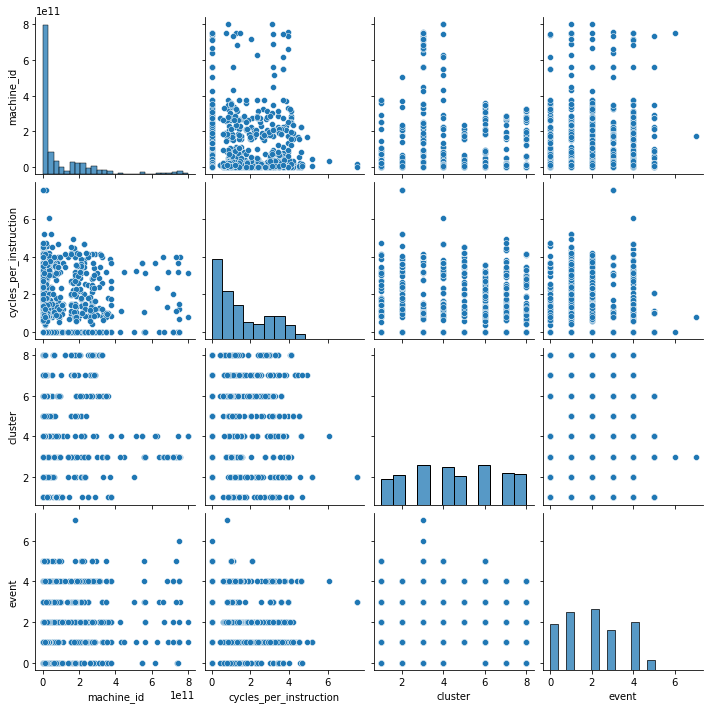

In [13]:
#Graficos entre as colunas
sns.pairplot(data)  

Gráficos Box plot


In [14]:
#Demonstrando numero de cluster por evento 
#Relembrando os eventos: 
#LOST = 0 #FAIL = 1 #FINISH = 2 #SCHEDULE = 3 #ENABLE = 4  #EVICT = 5 #KILL = 6 #UPDATE_PENDING = 7 
fig = px.box(data, x="event",y="cluster")
fig.show() 

GRÁFICO HISTOGRAMA EMPILHADO

<Figure size 432x288 with 0 Axes>

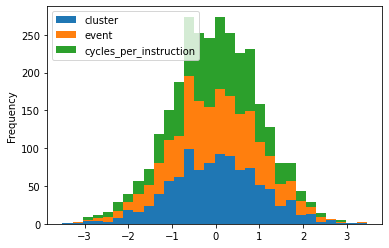

In [15]:
# HISTOGRAMA EMPILHADO 
# Comparando o numero de event, cycles_per_instruction e cluster
data_hist = pd.DataFrame(
      {
         "cluster": np.random.randn(1000) ,
         "event": np.random.randn(1000),
         "cycles_per_instruction": np.random.randn(1000),
       },
  columns=["cluster", "event","cycles_per_instruction"],
   ).astype(float);
plt.figure();
data_hist.plot.hist(stacked=True, bins=30);

Gráfico Boxplot

In [16]:
#Maquinas x Cluster
scatterplot1 = px.scatter(data, x="machine_id",y="cluster")
scatterplot1.show() 


In [40]:
data['cluster']

237118    6
25533     2
23378     3
121661    5
381315    7
         ..
328315    6
232110    7
385549    8
177849    8
38066     1
Name: cluster, Length: 1000, dtype: int64


Matriz de Correlação


In [17]:
#Indice de correlação entre as colunas do dataset
corr = data.iloc[:,0:].corr()
corr

,machine_id,cycles_per_instruction,cluster,event
machine_id,1.000000,0.010207,-0.072149,0.031540
cycles_per_instruction,0.010207,1.000000,0.098383,-0.063966
cluster,-0.072149,0.098383,1.000000,0.052517
event,0.031540,-0.063966,0.052517,1.000000


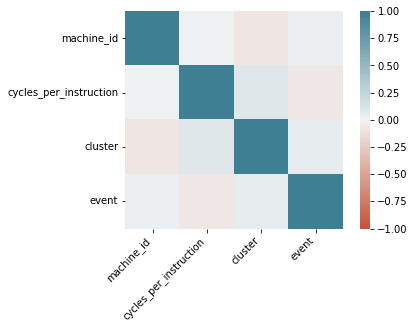

In [41]:
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Kmeans


In [57]:
#Aplicando Kmeans
kmeans = KMeans(n_clusters=5, random_state=1000)# random_state= semente aleatoria
clustering = kmeans.fit_predict(data) 
clustered= np.reshape(clustering, (1000,)) 
clustered   



array([4, 0, 2, 0, 4, 4, 0, 3, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0,
       3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0,
       1, 0, 0, 1, 1, 3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 4, 1, 4,
       1, 3, 1, 0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 3, 0, 3, 3, 0, 1, 1,
       0, 3, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 1, 0, 3,
       0, 3, 0, 3, 0, 4, 0, 1, 0, 0, 1, 1, 0, 4, 1, 4, 0, 3, 0, 0, 1, 0,
       0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 4, 0, 4, 0, 1, 0, 1, 0, 2,
       0, 1, 4, 0, 1, 1, 0, 4, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 1, 2, 0, 2, 0, 0, 0, 1, 0,
       3, 0, 0, 2, 0, 0, 4, 0, 0, 0, 4, 0, 3, 0, 2, 3, 3, 3, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 0, 0, 1, 1, 4, 0, 0, 3, 0, 0, 0, 0, 0, 4, 3, 0, 1,
       0, 0, 0, 0, 0, 2, 4, 4, 3, 0, 3, 0, 0, 4, 4, 0, 4, 1, 0, 4, 0, 0,
       4, 3, 0, 0, 0, 0, 0, 3, 0, 3, 0, 4, 0, 0, 1, 0, 1, 2, 0, 0, 3, 0,
       3, 0, 4, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4,

In [58]:
#Validando pelo metodo da silhueta
silhouette = silhouette_score(data, clustering)
print("Silhouette:", silhouette)

Silhouette: 0.7167716258570724


In [59]:
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage = 'average')
clustering = clustering.fit_predict(data)

In [60]:
silhouette_avg = silhouette_score(data, clustering)
print("Silhouette :", silhouette)

Silhouette : 0.7167716258570724


DBSCAN

In [104]:
df = data[['machine_id', 'cycles_per_instruction','cluster','event']]  
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
machine_id,1000.0,9.495995e+10,1.523134e+11,13724.0,3.108827e+09,2.173766e+10,1.556874e+11,7.996170e+11
cycles_per_instruction,1000.0,1.528009e+00,1.441784e+00,0.0,0.000000e+00,1.103124e+00,2.802329e+00,7.539603e+00
cluster,1000.0,4.562000e+00,2.202046e+00,1.0,3.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00
event,1000.0,2.072000e+00,1.476142e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00


In [105]:
df

,machine_id,cycles_per_instruction,cluster,event
237118,270895967679,1.456021,6,1
25533,16584900305,7.539603,2,3
23378,749217644201,1.251612,3,2
121661,121776263,4.202824,5,1
381315,284658073551,3.416835,7,1
...,...,...,...,...
328315,6926477237,0.932836,6,0
232110,10120427840,0.799285,7,0
385549,273553073061,0.000000,8,2
177849,10503049752,1.201205,8,4


In [119]:
db = DBSCAN(eps=0.5, min_samples=10).fit(df)
DBSCAN_dataset = df.copy()
DBSCAN_dataset.iloc[:,1::3] = db.labels_
labels = db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [124]:

clusters = len(set(labels)) - (1 if -1 in labels else 0)
noise = list(labels).count(-1)

print("Estimated number of clusters: ",clusters)
print("Estimated number of noise points: ", noise)


Estimated number of clusters:  0
Estimated number of noise points:  1000


In [125]:
DBSCAN_dataset.cluster.value_counts().to_frame() 

,cluster
3,151
6,150
4,143
7,119
8,118
2,113
5,107
1,99


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



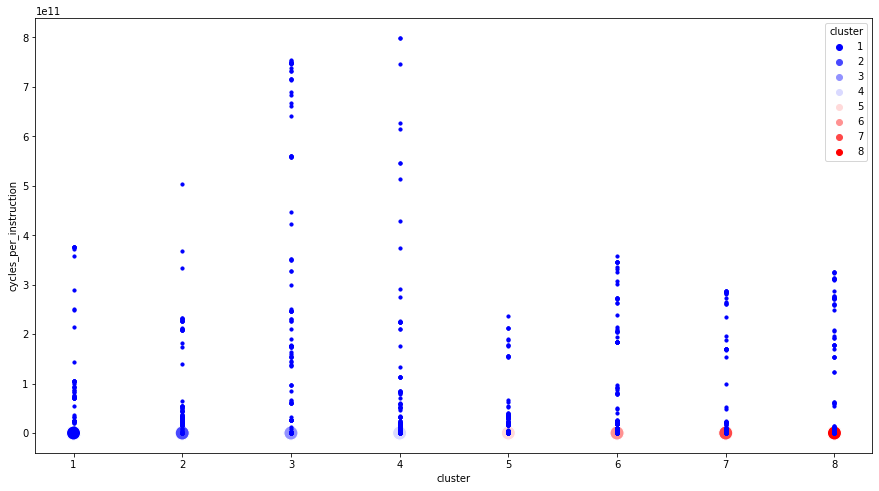

In [126]:

outliers = DBSCAN_dataset[DBSCAN_dataset['cycles_per_instruction']==-1]

fig, (axes) = plt.subplots(figsize=(15,8))

sns.scatterplot('cluster', 'cycles_per_instruction',

                data=DBSCAN_dataset[DBSCAN_dataset['event']>=0],

                hue='cluster', palette='bwr', legend='full', s=200)


axes.scatter(outliers['cluster'], outliers['machine_id'], s=10, label='outliers', c="Blue")



plt.show()



Hierarchical clustering

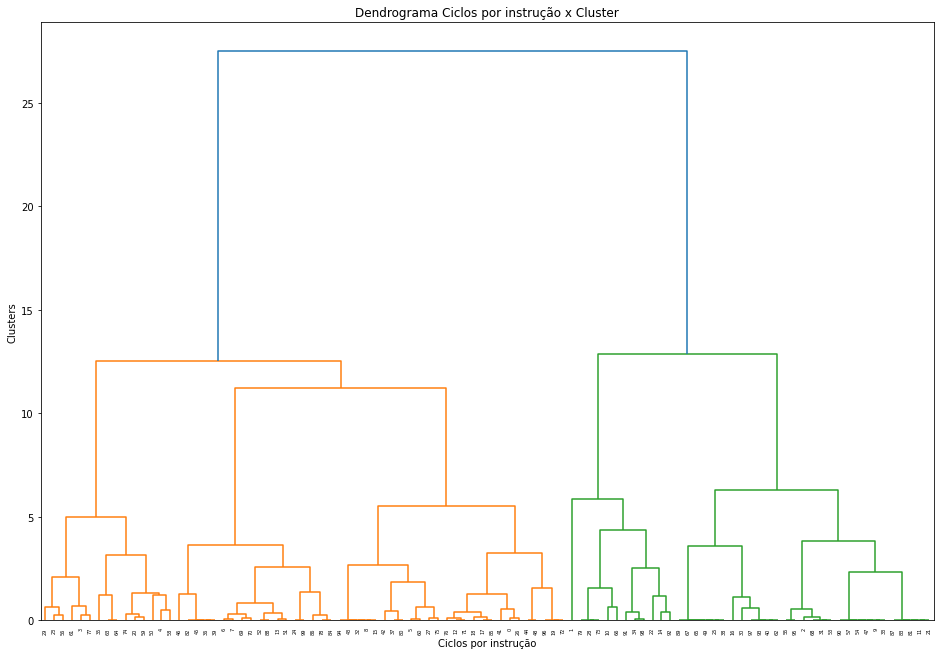

In [129]:
plt.figure(figsize=(16,11))
plt.title("Dendrograma Ciclos por instrução x Cluster")

selected_data = df.iloc[0:100,1:3:] 
clusters = shc.linkage( selected_data,
                       
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)  
plt.ylabel('Clusters')
plt.xlabel('Ciclos por instrução')
plt.show()

In [130]:
clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(selected_data)
clustering_model.labels_


array([1, 2, 0, 3, 3, 1, 4, 4, 1, 0, 2, 0, 1, 4, 2, 1, 0, 1, 1, 1, 3, 0,
       2, 3, 4, 0, 1, 1, 2, 3, 0, 0, 1, 0, 2, 3, 4, 1, 0, 4, 0, 1, 1, 1,
       1, 4, 4, 0, 1, 0, 3, 4, 4, 0, 0, 0, 3, 0, 3, 3, 1, 3, 0, 3, 3, 0,
       2, 0, 0, 4, 4, 1, 1, 2, 3, 1, 1, 3, 4, 2, 1, 0, 4, 0, 4, 1, 4, 0,
       4, 0, 0, 2, 2, 0, 1, 0, 1, 0, 2, 4])

Text(0.5, 1.0, 'CLusters x Ciclos por Instrução')

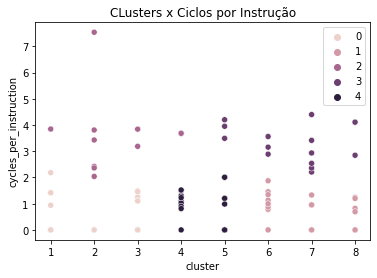

In [36]:
data_labels = clustering_model.labels_
sns.scatterplot(x='cluster', 
                y='cycles_per_instruction', 
                data=selected_data, 
                hue=data_labels).set_title('Clusters x Ciclos por Instrução')
     
